In [1]:
import numpy as np
import pandas as pd
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import json
import tensorflow
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Activation, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model, Model
from PIL import Image
from mtcnn.mtcnn import MTCNN


Using TensorFlow backend.


In [2]:
dataset=pd.read_csv("train.csv", header=None)
dataset = dataset.iloc[1:]
dataset[0] = 'images/' + dataset[0].astype(str)
dataset.head()

,0,1,2,3,4,5
1,images/2756.png,69,126,294,392,face_with_mask
2,images/2756.png,505,10,723,283,face_with_mask
3,images/2756.png,75,252,264,390,mask_colorful
4,images/2756.png,521,136,711,277,mask_colorful
5,images/6098.jpg,360,85,728,653,face_no_mask


In [3]:
train = pd.read_csv('train.csv')
Y = train['classname']
train.shape

(15412, 6)

In [4]:
images=os.path.join("images")
annotations=os.path.join('annotations')
print(len(os.listdir(images)))

6024


In [5]:
a=os.listdir(images)
b=os.listdir(annotations)
a.sort()
b.sort()
print(a[1698:1708])
print(b[:10])

['1801.jpg', '1802.jpg', '1803.jpg', '1804.jpg', '1805.jpg', '1806.jpg', '1807.jpg', '1808.jpg', '1809.jpg', '1810.jpg']
['1801.jpg.json', '1802.jpg.json', '1803.jpg.json', '1804.jpg.json', '1805.jpg.json', '1806.jpg.json', '1807.jpg.json', '1808.jpg.json', '1809.jpg.json', '1810.jpg.json']


In [6]:
test_images=a[:1698]
train_images=a[1698:]
train_ann=b
len(train_images)==len(train_ann)


True

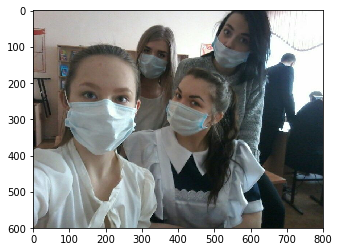

In [7]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img=plt.imread(os.path.join(images,train_images[98]))
plt.imshow(img)
plt.show()

In [8]:
df =train_csv=pd.read_csv(os.path.join('train.csv'))
train_csv.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [9]:
submission=pd.read_csv(os.path.join("submission.csv"))
submission.head()

,name,x1,x2,y1,y2,classname
0,1800.jpg,NaN,NaN,NaN,NaN,NaN
1,1800.jpg,NaN,NaN,NaN,NaN,NaN
2,1800.jpg,NaN,NaN,NaN,NaN,NaN
3,1799.jpg,NaN,NaN,NaN,NaN,NaN
4,1799.jpg,NaN,NaN,NaN,NaN,NaN


In [10]:
bbox=[]
for i in range(len(train_csv)):
    arr=[]
    for j in df.iloc[i][["x1",'x2','y1','y2']]:
        arr.append(j)
    bbox.append(arr)

In [11]:
df["bbox"]=bbox
df.head()

,name,x1,x2,y1,y2,classname,bbox
0,2756.png,69,126,294,392,face_with_mask,"[69, 126, 294, 392]"
1,2756.png,505,10,723,283,face_with_mask,"[505, 10, 723, 283]"
2,2756.png,75,252,264,390,mask_colorful,"[75, 252, 264, 390]"
3,2756.png,521,136,711,277,mask_colorful,"[521, 136, 711, 277]"
4,6098.jpg,360,85,728,653,face_no_mask,"[360, 85, 728, 653]"


In [12]:
def get_boxes(id):
    boxes=[]
    for i in df[df["name"]==str(id)]["bbox"]:
        boxes.append(i)
    return boxes
print(get_boxes('1806.jpg'))

[[509, 184, 617, 313], [545, 233, 610, 298], [546, 216, 611, 252]]


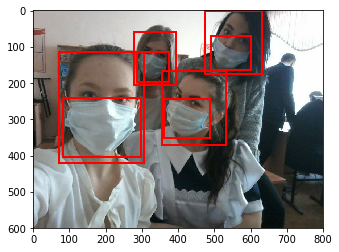

In [13]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
image=train_images[98]

img=plt.imread(os.path.join(images,image))

fig,ax = plt.subplots(1)
ax.imshow(img)
boxes=get_boxes(image)
for box in boxes:
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()


[[518, 116, 938, 632], [582, 126, 582, 126], [542, 300, 932, 613]]
[518, 116, 938, 632]
[582, 126, 582, 126]
[542, 300, 932, 613]


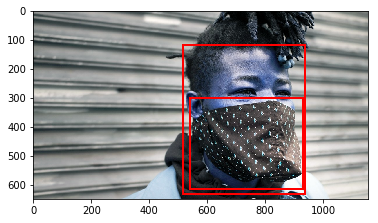

In [14]:
ann_path = "annotations/"
jdata = json.load(open(ann_path+train_ann[1860]))
anns = jdata["Annotations"]
#bb = anns[0]['BoundingBox']
bb = get_boxes('1861.jpg')
imgpath = "images/1861.jpg"
im = cv2.imread(imgpath)
fig,ax = plt.subplots(1)
ax.imshow(im)
print(bb)
for box in bb:
    print(box)
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()


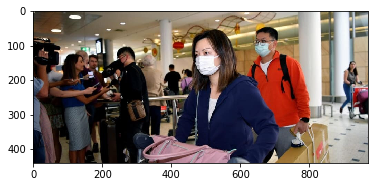

In [15]:
%matplotlib inline
img=plt.imread(os.path.join(images,train_images[11]))
plt.imshow(img)
plt.show()

In [16]:
df[df["name"]==train_images[11]]

,name,x1,x2,y1,y2,classname,bbox
14812,1812.jpg,636,47,711,133,face_with_mask,"[636, 47, 711, 133]"
14813,1812.jpg,465,52,581,189,face_with_mask,"[465, 52, 581, 189]"
14814,1812.jpg,468,123,537,194,mask_surgical,"[468, 123, 537, 194]"
14815,1812.jpg,636,86,691,137,mask_surgical,"[636, 86, 691, 137]"
14816,1812.jpg,636,78,679,107,eyeglasses,"[636, 78, 679, 107]"
14817,1812.jpg,241,102,292,169,face_with_mask,"[241, 102, 292, 169]"
14818,1812.jpg,240,130,271,164,mask_colorful,"[240, 130, 271, 164]"
14819,1812.jpg,91,125,148,183,face_no_mask,"[91, 125, 148, 183]"
14820,1812.jpg,157,124,190,173,face_no_mask,"[157, 124, 190, 173]"
14821,1812.jpg,910,143,936,178,face_no_mask,"[910, 143, 936, 178]"


## Preprocessing 

In [17]:
path = "images/"
train_features = []
train_labels = []
img_size = 128

for image_name in range(3550):
    img = cv2.imread(path + train_images[image_name])
    boxes = get_boxes(train_images[image_name])
    for idx, bb in enumerate(boxes):
        x,y,w,h = bb
        label = list(df[df["name"]==train_images[image_name]]["classname"])
        #if label[idx] == "face_no_mask" or label[idx] == "face_with_mask":
        roi = img[y:h, x:w]
        try:
            roi = cv2.resize(roi, (img_size, img_size), cv2.INTER_AREA)
            train_features.append(roi)
            train_labels.append(label[idx])
        except Exception as e:
            print("[ERROR]")

[ERROR]


In [18]:
X = np.array(train_features, dtype="float32")
X /= 255.0
y = np.array(train_labels)



In [19]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 3)

In [20]:
classes = ["hijab_niqab", "mask_colorful", "mask_surgical", "face_no_mask",
          "face_with_mask_incorrect", "face_with_mask", "face_other_covering",

           "scarf_bandana", "balaclava_ski_mask", "face_shield", "gas_mask",
          "turban", "helmet", "sunglasses", "eyeglasses", "hair_net", "hat",
          "goggles", "hood", "other"]

In [21]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y = to_categorical(y, num_classes=len(classes))


In [22]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=2)
import pickle
with open("X.pickle","wb") as f1:
    pickle.dump(X, f1)
with open("y.pickle","wb") as f2:
    pickle.dump(y, f2)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

In [24]:
img_size = 128

vgg = VGG16(weights="imagenet", include_top=False, input_shape=(img_size, img_size, 3))
for layer in vgg.layers:
    layer.trainable = False
top = vgg.output
top = GlobalAveragePooling2D()(top)
top = Dense(units=256, activation="relu")(top)
top = Dense(units=128, activation="relu")(top)
top = Dense(units=len(classes), activation="softmax")(top)

model = Model(inputs=vgg.input, outputs=top)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [25]:
optimizer = Adam(lr=0.001)

In [26]:
checkpoint = ModelCheckpoint('face_mask.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
reduceLR = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks = [checkpoint, reduceLR]

In [27]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=45, 
                 validation_data=(x_test, y_test), verbose=1,
                callbacks=callbacks)

Epoch 1/45
 27/186 [===>..........................] - ETA: 6:52 - loss: 2.2205 - accuracy: 0.3443

KeyboardInterrupt: 

In [ ]:
model.save('face_mask_model.h5')
import pickle
pickle_in1 = open('X.pickle', "rb")
X = pickle.load(pickle_in1)
pickle_in2 = open('y.pickle', "rb")
y = pickle.load(pickle_in2)

## Testing

In [29]:
model = load_model('face_mask.h5')

In [30]:
score = model.evaluate(x_test, y_test)
score
# accuracy = 80.93% on 10 epochs


51/51 [==============================] - 65s 1s/step - loss: 1.0286 - accuracy: 0.6628


[1.0285935401916504, 0.6627547740936279]

In [31]:
sub = "submission.csv"
subdf = pd.read_csv(sub)
submission_images = list(subdf["name"])

In [32]:
path = "images/"

predicted_classes = []
coordinates = []
image_names = []

detector = MTCNN()


for img_name in submission_images:
    first = img_name.split(".")[0]
    last = img_name.split(".")[1]
    if last == "jpe":
        img_name = first+"."+"jpeg"
    im = cv2.imread(path+img_name)
    color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = np.asarray(color)
    faces = detector.detect_faces(im)
    for i in range(len(faces)):
        x,y,w,h = faces[i]['box']
        x, y = abs(x), abs(y)
        roi = color[y:y+h, x:x+w]
        roi = cv2.resize(roi, (128,128), cv2.INTER_AREA)
        roi = np.array(roi).astype('float32')
        roi = roi.reshape(1, 128, 128, 3)
        preds = model.predict(roi)
        pred = np.argmax(preds, axis=1)
        predicted_classes.append(classes[int(pred)])
        coordinates.append([x,y,w,h])
        image_names.append(img_name)

In [33]:
print("Total size:", len(predicted_classes))
print("Image name:", image_names[6])
print("coordinates:", coordinates[6])
print("predicted class:", predicted_classes[6])

Total size: 27876
Image name: 1799.jpg
coordinates: [749, 291, 84, 97]
predicted class: face_no_mask


In [34]:
df_names = pd.DataFrame(image_names, columns=["name"])
df_coord = pd.DataFrame(coordinates, columns=['x1','x2','y1','y2'], dtype=float)
df_class = pd.DataFrame(predicted_classes, columns=["classname"])

In [35]:
dataframes = [df_names, df_coord, df_class]
result = pd.concat(dataframes, axis=1)

In [36]:
result.to_csv(r'final_submission_face_mask.csv')

In [37]:
from IPython.display import FileLink
FileLink(r'final_submission_face_mask.csv')

/Users/sayamsingla/Desktop/ML Codes/Face Mask detection/final_submission_face_mask.csv